In [114]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import math

In [115]:
# Load data
file_path = "GCB2022v27_MtCO2_flat.csv"
df_emission = pd.read_csv(file_path)
df_emission.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,1755,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,1756,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,1757,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,1758,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,1759,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Top 3 Polluters in 2021 and Percentage of Emission

In [116]:
#Filter df_emission (MtCo2) by year 2021 
df_emission21 = df_emission.loc[(df_emission['Year'] == 2021)]
df_emission21.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
271,Afghanistan,AFG,2021,11.874211,4.203536,7.419570,0.238847,0.012259,0.000000,NaN,0.296119
543,Albania,ALB,2021,4.619109,0.174413,3.246273,0.150245,1.048179,0.000000,NaN,1.618066
815,Algeria,DZA,2021,176.269070,1.095536,56.020598,92.791955,11.028039,15.332942,NaN,3.989977
1087,Andorra,AND,2021,0.452888,0.000000,0.452888,0.000000,0.000000,0.000000,NaN,5.730292
1359,Angola,AGO,2021,21.362717,0.000000,13.901716,2.951298,1.123730,3.385974,NaN,0.619141
1631,Anguilla,AIA,2021,0.144744,0.000000,0.144744,0.000000,0.000000,0.000000,NaN,9.188354
1903,Antarctica,ATA,2021,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2175,Antigua and Barbuda,ATG,2021,0.468695,0.000000,0.468695,0.000000,0.000000,0.000000,NaN,5.027895
2447,Argentina,ARG,2021,186.448284,4.816141,80.309110,94.327529,4.670734,2.324770,NaN,4.117967
2719,Armenia,ARM,2021,6.806045,0.012484,0.991559,5.460901,0.341102,0.000000,NaN,2.438591


In [117]:
#Sort by Total emmision from biggest to smallest
df_emission21 = df_emission21.sort_values(by=['Total'], ascending=False)
df_emission21.set_index('Country',inplace=True)

In [118]:
df_emission21.head()
# China, USA, and India were the biggest polluters of 2021

,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,,
Global,WLD,2021,37123.850352,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746,4.693699
China,CHN,2021,11472.369171,7955.985419,1713.339980,773.866062,852.961348,4.677478,171.538883,8.045741
USA,USA,2021,5007.335889,1002.299987,2233.778180,1637.038462,41.203135,67.684371,25.331754,14.858668
India,IND,2021,2709.683625,1802.311897,622.148121,133.450811,149.001244,2.771552,NaN,1.925088
Russia,RUS,2021,1755.547390,380.227147,403.080393,875.051751,21.920821,58.921786,16.345492,12.098650


In [119]:
#Percentage of Countries emission in 2021
df_emission21['Percentage_CO2_Emission'] = (df_emission21['Total']/(df_emission21.loc['Global']['Total']))*100
df_emission21.head(10)
# Top 3 polluters emits globally: China (30.9%), USA (13.5%), India (7.3%)

,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Percentage_CO2_Emission
Country,,,,,,,,,,,
Global,WLD,2021,37123.850352,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746,4.693699,100.000000
China,CHN,2021,11472.369171,7955.985419,1713.339980,773.866062,852.961348,4.677478,171.538883,8.045741,30.902961
USA,USA,2021,5007.335889,1002.299987,2233.778180,1637.038462,41.203135,67.684371,25.331754,14.858668,13.488191
India,IND,2021,2709.683625,1802.311897,622.148121,133.450811,149.001244,2.771552,NaN,1.925088,7.299037
Russia,RUS,2021,1755.547390,380.227147,403.080393,875.051751,21.920821,58.921786,16.345492,12.098650,4.728894
Japan,JPN,2021,1067.398435,418.820499,395.359389,221.525076,23.788868,0.344529,7.560075,8.565739,2.875236
International Transport,XIT,2021,1021.749204,NaN,1021.749204,NaN,NaN,NaN,NaN,NaN,2.752272
Iran,IRN,2021,748.878752,3.729952,222.961835,466.993766,22.524908,32.668290,NaN,8.517397,2.017244
Germany,DEU,2021,674.753566,230.221049,248.200624,173.484052,13.233969,1.807425,7.806447,8.089741,1.817574


In [120]:
#Top 3 combine in %
(df_emission21.loc['China']['Percentage_CO2_Emission'])+(df_emission21.loc['USA']['Percentage_CO2_Emission'])+(df_emission21.loc['India']['Percentage_CO2_Emission'])
#Top 3 countries emitted 51.7% of all global CO2 in 2021

51.69018973800005

In [121]:
#Top 3 combine in MtCO2
(df_emission21.loc['China']['Total'])+(df_emission21.loc['USA']['Total'])+(df_emission21.loc['India']['Total'])
#Top 3 countries emitted 19189 Metric Tons of all global CO2 in 2021

19189.388685

# Emission Trend 1750-2021

In [122]:
df_emission.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,1755,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,1756,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,1757,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,1758,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,1759,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
#Filter df_emission (MtCo2) by Global
df_emissionGlobal = df_emission.loc[(df_emission['Country'] == "Global")]
df_emissionGlobal.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62832,Global,WLD,1750,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011492
62833,Global,WLD,1751,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011438
62834,Global,WLD,1752,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011390
62835,Global,WLD,1753,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011339
62836,Global,WLD,1754,9.357856,9.357856,NaN,NaN,NaN,NaN,NaN,0.011294
62837,Global,WLD,1755,9.361520,9.361520,NaN,NaN,NaN,NaN,NaN,0.011249
62838,Global,WLD,1756,10.006384,10.006384,NaN,NaN,NaN,NaN,NaN,0.011973
62839,Global,WLD,1757,10.010048,10.010048,NaN,NaN,NaN,NaN,NaN,0.011927
62840,Global,WLD,1758,10.013712,10.013712,NaN,NaN,NaN,NaN,NaN,0.011881
62841,Global,WLD,1759,10.017376,10.017376,NaN,NaN,NaN,NaN,NaN,0.011837


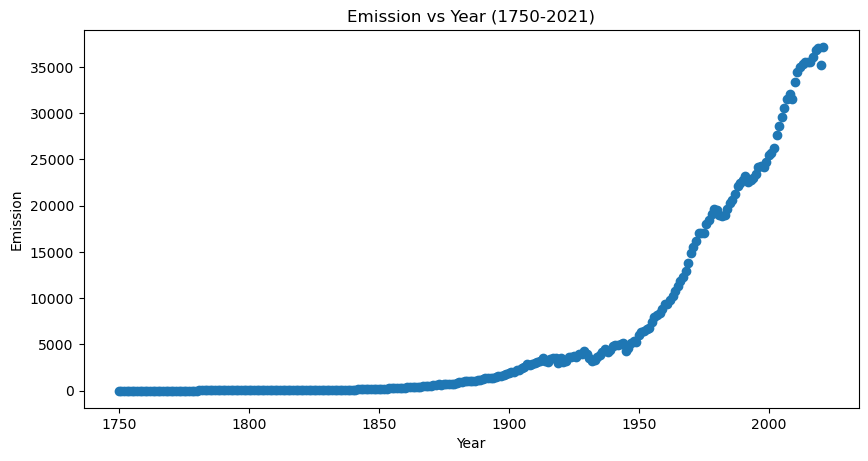

In [124]:
# Do a scatter plot for all years (1750-2001)
plt.scatter(df_emissionGlobal.Year,df_emissionGlobal.Total)
plt.xlabel('Year')
plt.ylabel('Emission')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Emission vs Year (1750-2021)')
plt.show()

Graph show an exponential growth of MtCO2 emission. The major intial uptick started in the 1900s. Lets convert the y value (Emissions) in a log value to be able to do a linear regression.

In [125]:
# Linear Regression for 1750-2021
X = df_emissionGlobal.Year.values.reshape(-1, 1)
X.shape

(272, 1)

In [126]:
# Transform the y into a logarithmic value and do a linear regression model
y = np.log(df_emissionGlobal.Total)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(272,)


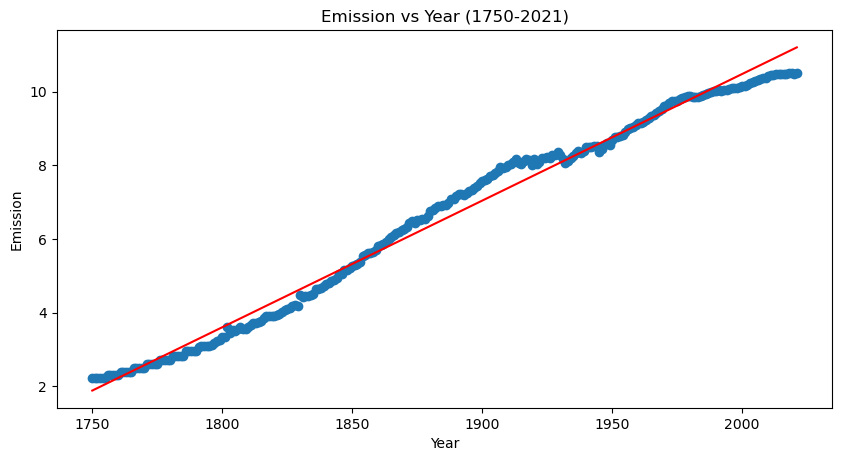

In [128]:
# Do a scatter plot for all years (1750-2001) with the linear trend
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Year')
plt.ylabel('Emission')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Emission vs Year (1750-2021)')
plt.show()

In [74]:
print(model.coef_)
print(model.intercept_)

[0.03437196]
-58.26175452605406


In [75]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)
# R2 = 98.8%. This means y=0.0343x - 58.2617 have an accuracy of 98.8%.

0.987702305295136

The linear model predictions is very accurate. Lets see how it looks for future predictions.

In [76]:
#Create a year dataframe going from 2021-2100
Years = np.arange(2021,2101).tolist()
Year_df = pd.DataFrame(Years, columns=['Year'])
Year_df

,Year
0,2021
1,2022
2,2023
3,2024
4,2025
...,...
75,2096
76,2097
77,2098
78,2099


In [77]:
# Linear module prediction
Year_df['Linear_Prediction_Model_1750-2021'] = np.exp((0.0343*(Year_df['Year'])-58.2617))
Year_df.sort_values(by=['Year'], ascending=False)
# According to this linear regression we will reach 953886.53mtCO2 in 2100 (more than a 50% increase from current levels)

,Year,Linear_Prediction_Model_1750-2021
79,2100,953886.528038
78,2099,921722.978284
77,2098,890643.932716
76,2097,860612.823563
75,2096,831594.316062
...,...,...
4,2025,72823.938086
3,2024,70368.429714
2,2023,67995.717212
1,2022,65703.008835


This linear prediction model seems quite high. Even looking at 2021 it shows 63487.6 MtCO2 which is almost double the actual number that we currenty have (37123 MtCO2). in 2100 its shows more than 20x the amount of CO2 emission than 2021. The growth rate might be a factor. Lets reduce our timeframe.

# Emission Trend 1900-2021

In [80]:
#Filter df_emissionGlobal for 1900-2021
df_Global1900_2021 = df_emissionGlobal.loc[df_emissionGlobal['Year'] > 1899]
df_Global1900_2021.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62982,Global,WLD,1900,1952.209498,1873.356867,67.309637,11.541600,0.001395,NaN,NaN,1.179988
62983,Global,WLD,1901,2016.744495,1929.131922,74.750267,12.860640,0.001666,NaN,NaN,1.211361
62984,Global,WLD,1902,2067.683966,1973.177627,80.808149,13.696032,0.002158,NaN,NaN,1.233733
62985,Global,WLD,1903,2254.094927,2154.002798,85.561821,14.527760,0.002548,NaN,NaN,1.335657
62986,Global,WLD,1904,2279.748708,2166.663609,96.083367,15.165234,0.002749,NaN,NaN,1.341202
62987,Global,WLD,1905,2427.313197,2311.142921,97.016809,17.169504,0.003512,NaN,NaN,1.417569
62988,Global,WLD,1906,2534.734414,2415.682993,97.892621,19.027152,0.004497,NaN,NaN,1.469314
62989,Global,WLD,1907,2888.307767,2746.956153,119.416045,19.877139,0.004630,NaN,NaN,1.661760
62990,Global,WLD,1908,2776.404367,2626.020205,128.759327,19.675680,0.115405,NaN,NaN,1.585453
62991,Global,WLD,1909,2890.468087,2730.133645,134.348724,23.522878,0.115641,NaN,NaN,1.638373


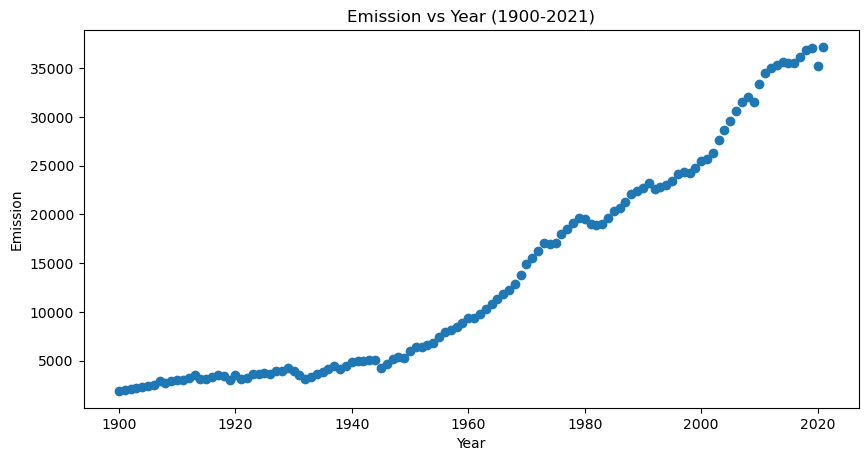

In [81]:
# Do a scatter plot from (1900-2001)
plt.scatter(df_Global1900_2021.Year,df_Global1900_2021.Total)
plt.xlabel('Year')
plt.ylabel('Emission')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Emission vs Year (1900-2021)')
plt.show()

Graph shows more a linear growth than an exponential growth. Lets do a linear regression. 

In [82]:
# Linear Regression
X = df_Global1900_2021.Year.values.reshape(-1, 1)
X.shape

(122, 1)

In [83]:
y = df_Global1900_2021.Total
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(122,)


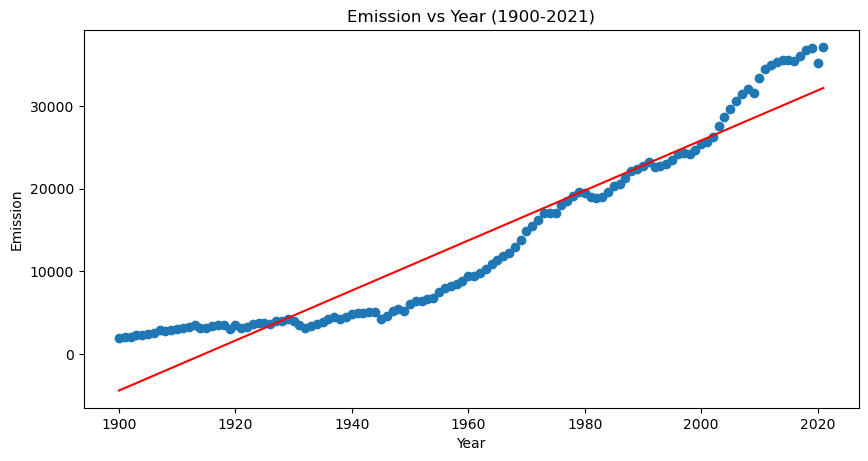

In [84]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Year')
plt.ylabel('Emission')
plt.title('Emission vs Year (1900-2021)')
plt.show()

In [85]:
print(model.coef_)
print(model.intercept_)

[302.90235922]
-579954.3288697449


In [86]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)
# R2 is 90.7% accurate. This means y=302.902x-579954.3 have an accuracy of 90.7%.

0.906808690645524

In [110]:
#Add this linear prediction model to our dataframe df_Global1900_2021
df_Global1900_2021['Linear_Prediction_Model'] = (302.902*(df_Global1900_2021.loc[:,'Year'])-579954.3)


In [88]:
df_Global1900_2021 = df_Global1900_2021.sort_values(by=['Year'], ascending=False)
df_Global1900_2021.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Linear_Prediction_Model
63103,Global,WLD,2021,37123.850352,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746,4.693699,32210.642
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423,31907.740
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633,31604.838
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753,31301.936
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682,30999.034


In [89]:
# Linear module prediction
Year_df['Linear_Prediction_Model_1900-2021'] = (302.902*(Year_df['Year'])-579954.3)
Year_df.sort_values(by=['Year'], ascending=False)
# According to this linear regression we will reach 56139.9mtCO2 in 2100 (more than a 50% increase from current levels)

,Year,Linear_Prediction_Model_1750-2021,Linear_Prediction_Model_1900-2021
79,2100,953886.528038,56139.900
78,2099,921722.978284,55836.998
77,2098,890643.932716,55534.096
76,2097,860612.823563,55231.194
75,2096,831594.316062,54928.292
...,...,...,...
4,2025,72823.938086,33422.250
3,2024,70368.429714,33119.348
2,2023,67995.717212,32816.446
1,2022,65703.008835,32513.544


The linear prediction model from 1900-2021 has an accuracy rate of 90.7%. It does seem that the linear prediction does not completely match with the recent actuals. In 2021 actual emission were approx. 37100 MtCO2, while the prediction showed approx. 32200 MtCO2. it is, however, much closer to the actuals in 2021 than the '1750-2021' model. The emission growth rate seems to be a factor. Lets take a look at the 2000-2021 timeframe.

# Emission Trend 2000-2021

In [90]:
# lets focus on the last 20 years
df_Global2000_2021 = df_emissionGlobal.loc[df_emissionGlobal['Year'] > 1999]
df_Global2000_2021.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63082,Global,WLD,2000,25453.622139,9203.117603,10302.090594,4731.291034,721.927315,278.928472,216.267121,4.139541
63083,Global,WLD,2001,25668.048326,9255.256797,10390.668975,4773.584851,754.331663,281.128017,213.078023,4.119578
63084,Global,WLD,2002,26281.037468,9678.959137,10385.864180,4905.853640,796.052479,298.553835,215.754196,4.163394
63085,Global,WLD,2003,27651.596453,10518.463642,10679.654448,5081.468111,852.252693,299.375515,220.382043,4.324685
63086,Global,WLD,2004,28636.695037,10871.584335,11042.504634,5257.190057,910.566319,323.802545,231.047147,4.422142
63087,Global,WLD,2005,29614.602256,11543.334878,11139.399176,5380.665522,964.306101,345.094230,241.802350,4.515677
63088,Global,WLD,2006,30593.116788,12188.840276,11246.321550,5506.809201,1051.668722,346.860142,252.616896,4.606415
63089,Global,WLD,2007,31506.789200,12776.360246,11283.665343,5694.133805,1129.389392,363.985324,259.255090,4.684364
63090,Global,WLD,2008,32085.836322,13192.796643,11251.325081,5864.291234,1143.738362,374.074157,259.610844,4.710472
63091,Global,WLD,2009,31564.030692,13016.427997,10996.948677,5751.954007,1175.729621,379.401924,243.568467,4.575621


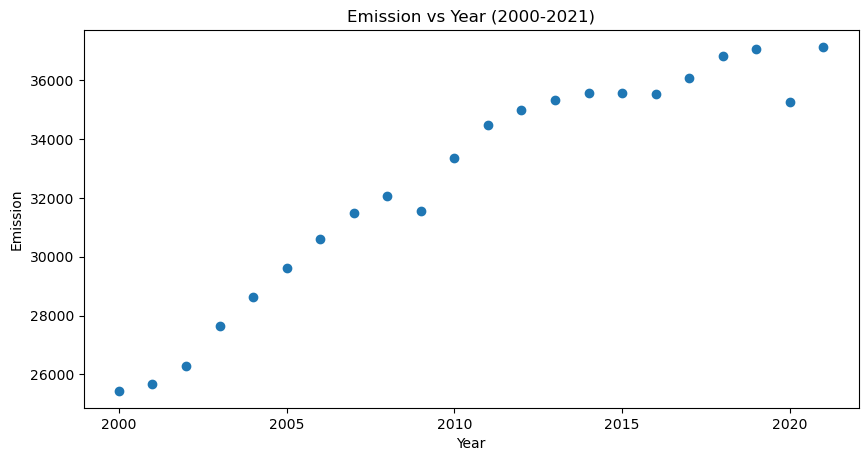

In [91]:
# Do a scatter plot from (2000-2021)
plt.scatter(df_Global2000_2021.Year,df_Global2000_2021.Total)
plt.xlabel('Year')
plt.ylabel('Emission')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Emission vs Year (2000-2021)')
plt.show()

Graph still shows a linear growth. However it does appear less agressive than the previous scatter plot from 1900-2021.
This might signal a plateau for the emission.

In [92]:
# Linear Regression for 2000-2021
X = df_Global2000_2021.Year.values.reshape(-1, 1)
X.shape

(22, 1)

In [93]:
y = df_Global2000_2021.Total
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(22,)


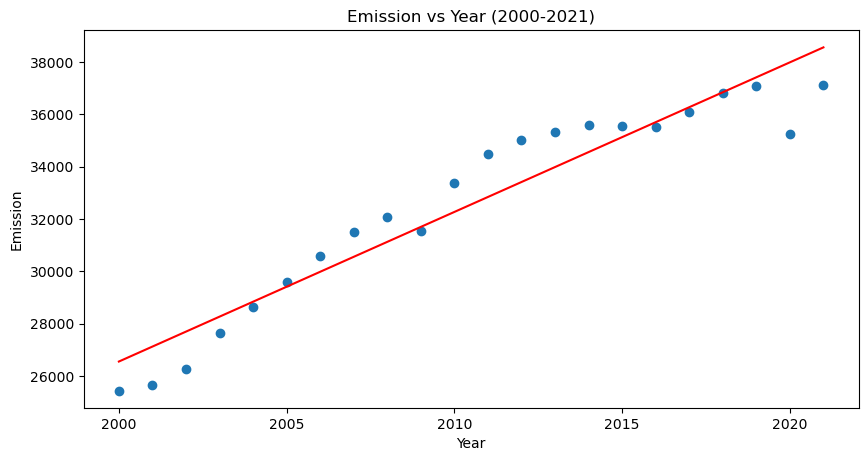

In [94]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Year')
plt.ylabel('Emission')
plt.title('Emission vs Year (2000-2021)')
plt.show()

In [95]:
print(model.coef_)
print(model.intercept_)

[571.10985794]
-1115657.904084031


In [96]:
r2_score(y,y_pred)
# R2 is 91.4% accurate. This means y=571.11x-1115657.9 have an accuracy of 91.4%. 

0.9142004678657292

In [97]:
# Lets add it to our dataframe to see the difference between both predictions
Year_df['Linear_Prediction_Model_2000-2021'] = (571.11*(Year_df['Year'])-1115657.9)
Year_df.sort_values(by=['Year'], ascending=False)

,Year,Linear_Prediction_Model_1750-2021,Linear_Prediction_Model_1900-2021,Linear_Prediction_Model_2000-2021
79,2100,953886.528038,56139.900,83673.10
78,2099,921722.978284,55836.998,83101.99
77,2098,890643.932716,55534.096,82530.88
76,2097,860612.823563,55231.194,81959.77
75,2096,831594.316062,54928.292,81388.66
...,...,...,...,...
4,2025,72823.938086,33422.250,40839.85
3,2024,70368.429714,33119.348,40268.74
2,2023,67995.717212,32816.446,39697.63
1,2022,65703.008835,32513.544,39126.52


The prediction from the 2000-2021 model is more than 50% than that of the 1900-2021 model in 2100. Both are accurate in term of their R2. However the predictions are not close. This shows the growth rate of emission is not constant and actually accelerated over time. Let's do one final linear regression with the timeframe 1980-2021 to see how it will compared to the 2000-2021 timeframe. If the predictions are similar, we can assume that the emission growth rate did not change much during the last 40 years.

# Emission Trend 1980-2021

In [98]:
# lets focus on the last 40 years
df_Global1980_2021 = df_emissionGlobal.loc[df_emissionGlobal['Year'] > 1979]
df_Global1980_2021.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63062,Global,WLD,1980,19501.263339,7024.128811,8951.775558,2758.101427,402.619608,316.435558,NaN,4.388215
63063,Global,WLD,1981,19036.118109,7004.883319,8550.304967,2794.346721,402.748288,237.162981,NaN,4.207223
63064,Global,WLD,1982,18884.487014,7126.512351,8345.175954,2731.273279,400.937145,235.574963,NaN,4.098209
63065,Global,WLD,1983,19006.539624,7314.190173,8260.815187,2760.541893,409.876965,212.846811,NaN,4.050940
63066,Global,WLD,1984,19664.753809,7668.797447,8328.840383,3010.425483,417.702984,186.751322,NaN,4.117552
63067,Global,WLD,1985,20325.486795,8217.823510,8326.771194,3121.400874,422.772266,181.446646,NaN,4.180710
63068,Global,WLD,1986,20627.358491,8335.814386,8576.333790,3045.544194,440.349287,169.667801,NaN,4.167090
63069,Global,WLD,1987,21273.904184,8617.360981,8654.658723,3305.280002,459.191671,163.006815,NaN,4.220188
63070,Global,WLD,1988,22107.794982,8910.819131,8972.672132,3466.022378,483.609285,185.509106,NaN,4.307585
63071,Global,WLD,1989,22410.401527,8909.615731,9130.079809,3639.817109,493.499968,150.679710,NaN,4.290136


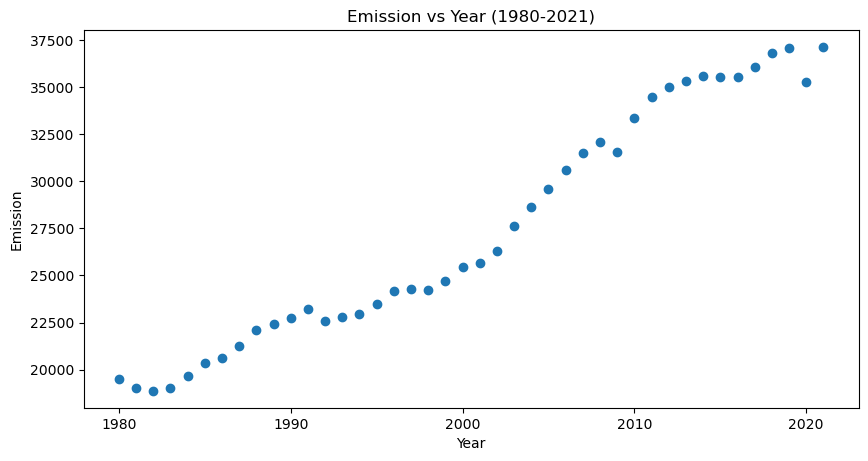

In [99]:
# Do a scatter plot from (2011-2021)
plt.scatter(df_Global1980_2021.Year,df_Global1980_2021.Total)
plt.xlabel('Year')
plt.ylabel('Emission')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Emission vs Year (1980-2021)')
plt.show()


Graph still shows a linear growth. It does look quite similar to the 2000-2021 trend.

In [100]:
# Linear Regression for 1980-2021
X = df_Global1980_2021.Year.values.reshape(-1, 1)
X.shape

(42, 1)

In [101]:
y = df_Global1980_2021.Total
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(42,)


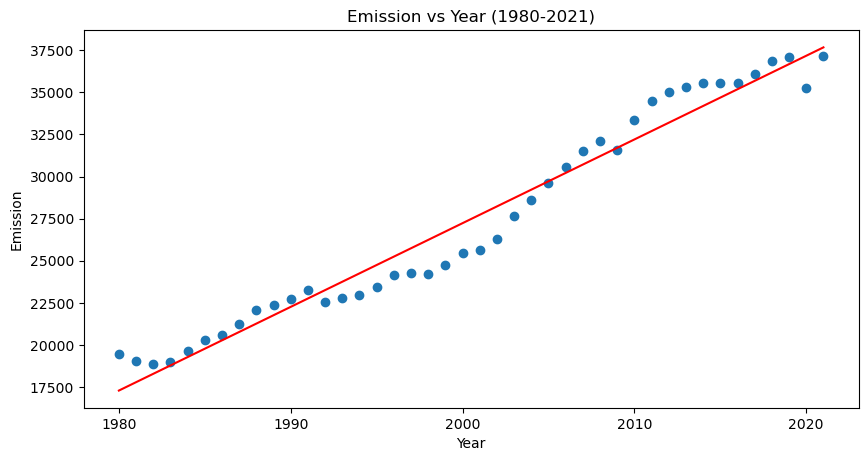

In [102]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Year')
plt.ylabel('Emission')
plt.title('Emission vs Year (1980-2021)')
plt.show()

In [103]:
print(model.coef_)
print(model.intercept_)

[496.4279629]
-965619.4878944953


In [104]:
r2_score(y,y_pred)
# R2 is 96.37% accurate. This means y=496.428x-965619.488 have an accuracy of 96.37%.
# This is more than 5% accurate than our previous models.

0.9635693135164551

In [105]:
# Lets add it to our data frame  to see the difference between all our predictions
Year_df['Linear_Prediction_Model_1980-2021'] = (496.428*(Year_df['Year'])-965619.488)
Year_df.sort_values(by=['Year'], ascending=False)

,Year,Linear_Prediction_Model_1750-2021,Linear_Prediction_Model_1900-2021,Linear_Prediction_Model_2000-2021,Linear_Prediction_Model_1980-2021
79,2100,953886.528038,56139.900,83673.10,76879.312
78,2099,921722.978284,55836.998,83101.99,76382.884
77,2098,890643.932716,55534.096,82530.88,75886.456
76,2097,860612.823563,55231.194,81959.77,75390.028
75,2096,831594.316062,54928.292,81388.66,74893.600
...,...,...,...,...,...
4,2025,72823.938086,33422.250,40839.85,39647.212
3,2024,70368.429714,33119.348,40268.74,39150.784
2,2023,67995.717212,32816.446,39697.63,38654.356
1,2022,65703.008835,32513.544,39126.52,38157.928


The prediction models 2000-2021 and 1980-2021 seems very close. Especially for the next 5 years. This is also very close to our actuals in 2020 of approx. 37100 MtCO2 looking at the 2021 predictions. This shows evidence that the growth rate did not change much during the last 40 years and that the '1980-2021' prediction model can be used.

## Conclusion

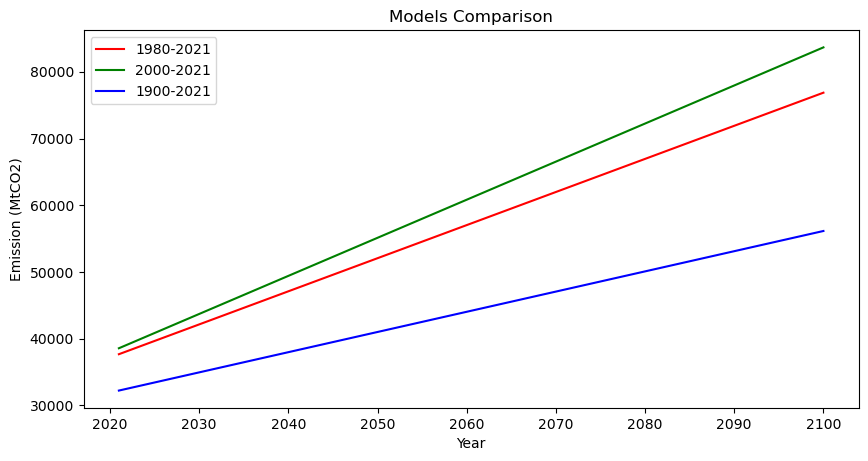

In [107]:
# Lets compared the models in a graph, we shall drop the first linear model we did (1750-2021) as the predictions are too high.
# Assign variables 
y = Year_df['Linear_Prediction_Model_1980-2021']
z = Year_df['Linear_Prediction_Model_2000-2021']
e = Year_df['Linear_Prediction_Model_1900-2021']

X = Year_df.Year
  
# Plotting the curves 
plt.plot(X, y, color='r', label='1980-2021')
plt.plot(X, z, color='g', label='2000-2021')
plt.plot(X, e, color='b', label='1900-2021')

  
# Labels
plt.xlabel('Year')
plt.ylabel('Emission (MtCO2)')
plt.title('Models Comparison')
  
# Adding legend
plt.legend()
  
plt.show()

If we compared the predictions, we can conclude that the 1980-2021 and 2000-2021 models are much closer in term of predictions than the 1900-2021 graph. However, The prediction does start to diverge the longer time passes. 

The model comparison shows 3 important components:

1) Since 1900 the emission growth rate has drastically increased and our predicted emission shifted upward over the years. This is apparent looking at the 2020 year where the emission number increased as the model data became more recent.

2) The graphs shows that the emission level does seems to want to plateau in term of growth rate. This is evident since the 1980-2021 and 2000-2021 models are very close in term of predictions. Especially comparing to the 1900-2021 model which diverge by more than 50% in 2100. 

3) All graphs shows the CO2 level will increase by more than 50% in 2100 compared to 2020. This is true for all 3 predictions. 


In [108]:
# The paris agreement states by 2030 emissions should be cut by 40% from 1990 emission.
Emission2050 = Year_df.loc[Year_df['Year'] <2051]
Emission2050.head(30)

,Year,Linear_Prediction_Model_1750-2021,Linear_Prediction_Model_1900-2021,Linear_Prediction_Model_2000-2021,Linear_Prediction_Model_1980-2021
0,2021,63487.606970,32210.642,38555.41,37661.500
1,2022,65703.008835,32513.544,39126.52,38157.928
2,2023,67995.717212,32816.446,39697.63,38654.356
3,2024,70368.429714,33119.348,40268.74,39150.784
4,2025,72823.938086,33422.250,40839.85,39647.212
5,2026,75365.131494,33725.152,41410.96,40143.640
6,2027,77994.999918,34028.054,41982.07,40640.068
7,2028,80716.637676,34330.956,42553.18,41136.496
8,2029,83533.247062,34633.858,43124.29,41632.924
9,2030,86448.142113,34936.760,43695.40,42129.352


In [109]:
# show the actual emission for comparison
actual_data = df_Global1900_2021[['Year','Total']]
actual_data.head(35)

,Year,Total
63103,2021,37123.850352
63102,2020,35264.085734
63101,2019,37082.558969
63100,2018,36826.506600
63099,2017,36096.739276
63098,2016,35524.193212
63097,2015,35558.565735
63096,2014,35577.534774
63095,2013,35319.201624
63094,2012,35006.267581


In 1990, emissions were 22757.48 MtCO2. Based on the paris accord the goal was to reduce emissions by at least 40% by 2030 (~16000 MtCO2) compared to 1990 levels. However based on our models this will not be the case. The most accurate model (1980-2021) shows a prediction of 42129 MtCO2. An 85% increased from 1990 levels. We can conclude that, based on these models, The paris climate accord goal of CO2 emission will not be reached based on the current global emissions. This is assuming the emission trend remains the same. 

In [112]:
Emission2050.to_csv('CO2 Emission Predictions 2021-2050.csv')